In [3]:
%matplotlib inline
import numpy as np
import math
from matplotlib import pyplot as plt

##1D Gradient Descent

1) Let us consider the function
$$ f(x) = (x-2)^2 + 1 $$
First plot it.

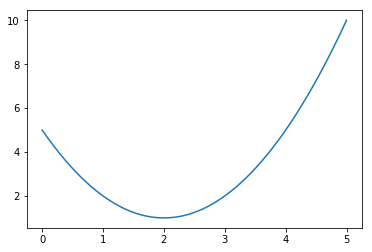

In [4]:
def f(x):
    return (x-2)**2 + 1
xs = np.linspace(0,5,1000)
ys = f(xs)
plt.plot(xs,ys)




2) If we start at $x=4$, which way should we move and why?

In [5]:
#left, cuz min to the left, at x = 2 actually

3)If the step size is constants = 1.1, what does the update rule look like?

$$x_{n+1} = \ldots$$

In [6]:
#if slope is negative we want to increase x
#if slope is positive we want to decrease x
#x(n+1) = xn - stepzie * f('x)/|f(x)|
stepSize = 1.1
def df(x):
    return 2*(x-2)

x = 4
x = x - df(x)/abs(df(x))*stepSize
print x

2.9


4)Let try it with step size = 1.1. For 10 iteration. Print and plot your point as you go. Can you understand the behavior?

[4, 2.9, 1.7999999999999998, 2.9, 1.7999999999999998, 2.9, 1.7999999999999998, 2.9, 1.7999999999999998, 2.9, 1.7999999999999998]


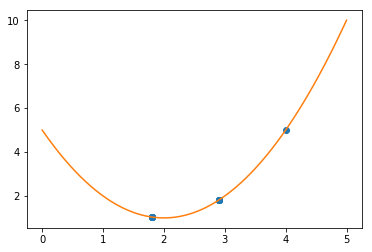

In [7]:
points = [4]
pointsy = [f(4)]
x = 4
stepSize = 1.1
for i in range(10):
    x = x - df(x)/abs(df(x))*stepSize
    points.append(x)
    pointsy.append(f(x))
print points
plt.plot(points,pointsy,'o')
plt.plot(xs,ys)
    
    

5)Now let's try step size=0.01 for 100 iteration. Print and plot your point as you go. Can you understand the behavior?

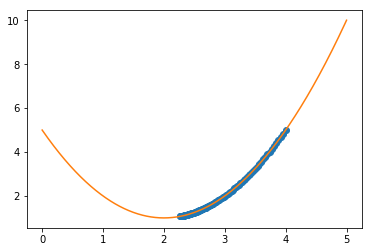

In [8]:
#BAD VERSION: DO NOT USE
def gradient_descent(x,n,stepSize):
    x = 4
    pointsx = [4]
    pointsy = [f(4)]
    for i in range(n):
        x = x - df(x)*stepSize
        pointsx.append(x)
        pointsy.append(f(x))
    return pointsx,pointsy
x,y =gradient_descent(4,100,0.01)
plt.plot(x,y,'o')
plt.plot(xs,ys)




        
    

6) When do we want the step size to be small and when do you want the step size to be big?

In [9]:
#when we are far -> bigStepSize
#when we are newar -> small steppSize

7) What function kind of does that?

In [10]:
#Lambda*abs(f'(x))

8)If we use that function, what does the update rule looks like.

In [11]:
#x(n+1) = xn - lambda*f('x)* (f('x)/abs(f'(x)))

def update_rule(x):
    return x - lmd*df(x)

    


9) Try it with $\lambda=0.1$. Print and Plot to see what happens?

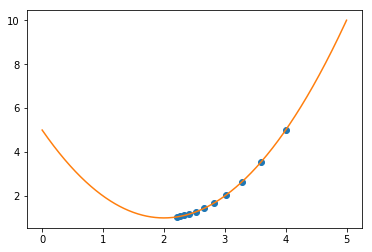

In [12]:
def gradient_descent(x,n,stepSize):
    x = 4
    pointsx = [4]
    pointsy = [f(4)]
    for i in range(n):
        x = x - df(x)*stepSize
        pointsx.append(x)
        pointsy.append(f(x))
    return pointsx,pointsy
x,y =gradient_descent(4,10,0.1)
plt.plot(x,y,'o')
plt.plot(xs,ys)

10) Try it with $\lambda = 1.1$. For 4 iterations. Can you see how it goes?

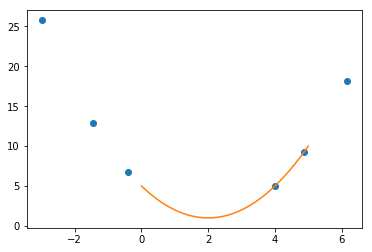

In [13]:
def gradient_descent(x,n,stepSize):
    pointsx = [x]
    pointsy = [f(x)]
    for i in range(n):
        x = x - df(x)*stepSize
        pointsx.append(x)
        pointsy.append(f(x))
    return pointsx,pointsy
x,y = gradient_descent(4,5,1.1)
plt.plot(x,y,'o')
plt.plot(xs,ys)

###Multi-Dimension Gradient Descent

1) Let us consider the function.
$$f(x,y) = (x-2)^2 + xy + 2y + 1$$
Make the 3D plot.

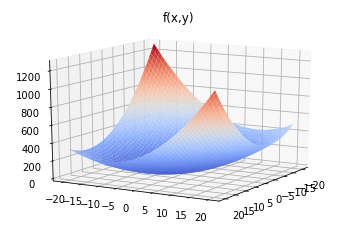

In [14]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
#see matplotlib3d surface
def f(x,y):
    return (x-2)**2+x*y+y**2+1
nx = 200
ny = 200
x = np.linspace(-20,20,nx)
y = np.linspace(-20,20,ny)
xgrid, ygrid = np.meshgrid(x, y)
#print ygrid
uz = np.zeros((nx,ny))
for ix in range(nx):
    for iy in range(ny):
        xx = x[ix]
        yy = y[iy]
        uz[iy,ix] = f(xx,yy) ##<<<<<<This is not a typo: [iy,ix]
        
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.gca().view_init(elev=15., azim=30)
ucs = ax.plot_surface(xgrid, ygrid, uz, cmap=cm.coolwarm)
plt.title('f(x,y)')

2) Plot the contour.

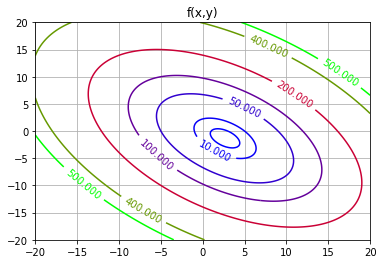

In [15]:
#see http://matplotlib.org/examples/pylab_examples/contour_demo.html
def f(x,y):
    return (x-2)**2+x*y+y**2+1

nx = 200
ny = 200
x = np.linspace(-20,20,nx)
y = np.linspace(-20,20,ny)
xgrid, ygrid = np.meshgrid(x, y)
#print ygrid
uz = np.zeros((nx,ny))

for ix in range(nx):
    for iy in range(ny):
        xx = x[ix]
        yy = y[iy]
        uz[iy,ix] = f(xx,yy) ##<<<<<<This is not a typo: [iy,ix]

ucs = plt.contour(x, y, uz, [2,10,50,100,200,400,500], cmap=cm.brg)
plt.clabel(ucs, inline=1, fontsize=10)
plt.grid()
plt.title('f(x,y)')

3)Where do you think the minimum is?

In [16]:
#In the middle 

4)What is the gradient at (10,-15)? Use plt.arrow to plot arrow.

(0, 2)

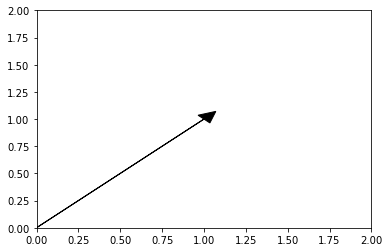

In [17]:
plt.arrow(0,0,1,1,head_width=0.1, head_length=0.1,fc='k',ec='k')
plt.xlim(0,2)
plt.ylim(0,2)

(2.6666666666666683, -1.3333333333333346)


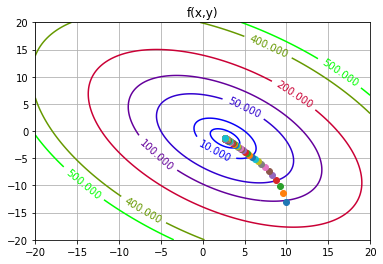

In [18]:
nx = 200
ny = 200
x = np.linspace(-20,20,nx)
y = np.linspace(-20,20,ny)
xgrid, ygrid = np.meshgrid(x, y)
#print ygrid
uz = np.zeros((nx,ny))

for ix in range(nx):
    for iy in range(ny):
        xx = x[ix]
        yy = y[iy]
        uz[iy,ix] = f(xx,yy) ##<<<<<<This is not a typo: [iy,ix]

ucs = plt.contour(x, y, uz, [2,10,50,100,200,400,500], cmap=cm.brg)
plt.clabel(ucs, inline=1, fontsize=10)
plt.grid()
plt.title('f(x,y)')
def f(x,y):
    return (x-2)**2 +x*y+y**2+1

def dfx(x,y):
    return 2*(x-2)+ y
def dfy(x,y):
    return x + 2*y

def gradient(x,y,step_size):
    return [x - dfx(x,y)*step_size , y-  dfy(x,y)*step_size]

def gradient_descend_2d(x,y, n, step_size):
    for i in range(n):
        x,y =  gradient(x,y,step_size)
        plt.plot(x,y,'o')
    return x,y

ans = gradient_descend_2d(10,-15,1000,0.1)
print ans



5) If we want to minimize the function which way should we go? Find the unit vector in that direction.

In [19]:
#f(x + ss*x,y + ssx) = f(x,y) + partialDiff of x + partialDif of y 

#change in f  = f,x * change in x + f,y + change in y


6) What should your update rule look like? Use vector addition.

In [20]:
#f(x + ss*x,y + ssx) = f(x,y) + partialDiff of x + partialDif of y 

7) Use what we learn in 1D. How far should we go? What should the update rule really look like?

8) Use $\lambda = 0.1$ and see where the points go

###Linear Regression Revisited

Let us consider the problem of findind a line that pass through the points.

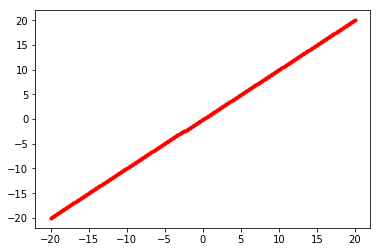

In [21]:
np.random.seed(123)
n = 100
dx = np.linspace(0,1,n)
dy = -2*dx + 1 + np.random.randn(n)/2
plt.plot(x,y,'.r')

1) What exactly are we trying to minimize and why?

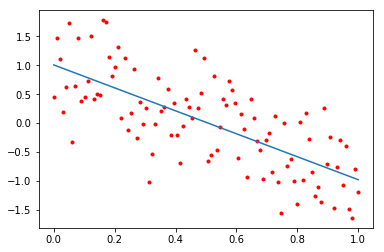

In [22]:
#distance between point and line
#find m and c that minimize
#cost function
plt.plot(dx,dy,'.r')
def cost(x):
    #put things in here
    m,c = x #tuple expansion
    cc = sum((m*dx + c - dy)**2)
    return cc
    
#Derivative
def grad(f,x):
    h = 0.0001
    fx = (f(x+[h,0]) - f(x-[h,0]))/(2*h)
    fy = (f(x+[0,h]) - f(x-[0,h]))/(2*h) 
    return np.array([fx,fy])

def gradient_descent(f,x0,l=0.1,n=10000):
    x = np.array(x0)
    for i in range(n):
        x = x - l*grad(f,x)
    return x
m,c = gradient_descent(cost,[0,0],0.001)
liney = m*dx + c
plt.plot(dx,liney)
        

2) Minimize and Visualize it.

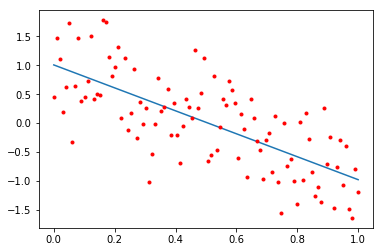

In [27]:
import scipy.optimize
def cost(x):
    #put things in here
    m,c = x #tuple expansion
    cc = sum((m*dx + c - dy)**2)
    return cc
res = scipy.optimize.minimize(cost,[-2,3.])
m,c = res.x
plt.plot(dx,m*dx+c)
plt.plot(dx,dy,'.r')
#coming up with a cost function is the real challenge.

    

###Separating Line.

We want to draw a separating line betwen two datasets shown below.

In [28]:
np.random.seed(234)
n1 = 100
n2 = 100
mean = [0, 0]
cov = [[1, -0.5], [-0.5, 1]]
r1, r2 = np.random.multivariate_normal(mean, cov, n1).T
#plt.plot(r1, r2, '.r')

mean = [2, 2]
cov = [[1, 0], [0, 1]]
b1, b2 = np.random.multivariate_normal(mean, cov, n2).T
#plt.plot(b1, b2, '.b')

c = np.zeros(n1+n2)
c[:n1] = 1.
c[n1:] = 0.
#print c

d = np.zeros((n1+n2,2))
d[:n1,0] = r1
d[:n1,1] = r2
d[n1:,0] = b1
d[n1:,1] = b2

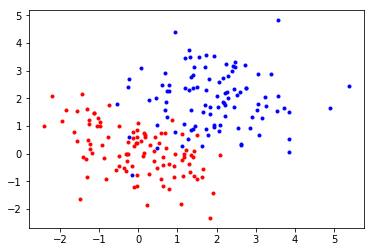

In [29]:
plt.plot(d[c==1,0], d[c==1,1],'.r')#note boolean indexing
plt.plot(d[c==0,0], d[c==0,1],'.b')#note boolean indexing

1) How can we model this as a optimization problem?

2) What equation do we plot?

3) Minimize and plot it to see that you get the right line.

In [33]:
#this is how you make a padded array
nr, nc = d.shape
pd = np.zeros((nr,nc+1))
pd[:,1:] = d
pd[:,0] =  1.0


In [57]:

def theta(s):
    v = 1/(1+np.exp(-s))
    return v

def cost(w):
    m,ci =  w
    ans = 0
    for cc,dd in zip(c,d):
        x,y = dd
        if cc > 0.0:
            
            ans += np.exp(y - (m*x + ci) )/ (1 + np.exp((y -( m*x + ci ))))
        else:
            ans += np.exp( (m*x + ci )- y )/ (1 + np.exp(( (m*x + ci)  - y)))
    return ans

import scipy.optimize 
res = scipy.optimize.minimize(cost,[1,1])
a,b = res.x
xs = np.linspace(-2,5,1000)
ys = a*xs + b




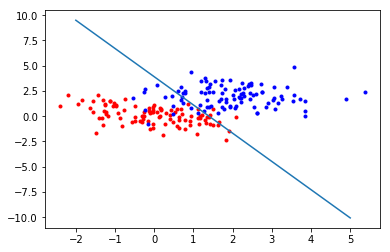

In [58]:
plt.plot(d[c==1,0], d[c==1,1],'.r')#note boolean indexing
plt.plot(d[c==0,0], d[c==0,1],'.b')#note boolean indexing
plt.plot(xs,ys)


In [99]:
def theta(s):
    v = np.exp(s/(1+np.exp(-s)))
    return v
def cost(w):
    m,ci =  w
    ans = 0
    for cc,dd in zip(c,d):
        x,y = dd
        if cc == 1: 
            ans += theta(y - (m*x + ci))
        elif cc == 0:
            theta((m*x + ci )- y )
    return ans

import scipy.optimize 
res = scipy.optimize.minimize(cost,[1,2])
a,b = res.x
xs = np.linspace(-2,5,1000)
ys = a*xs + b


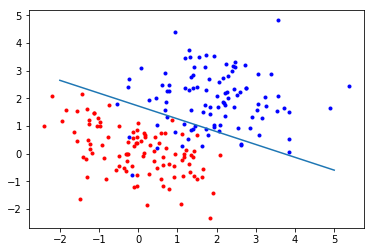

In [100]:
plt.plot(d[c==1,0], d[c==1,1],'.r')#note boolean indexing
plt.plot(d[c==0,0], d[c==0,1],'.b')#note boolean indexing
plt.plot(xs,ys)